In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdMolDescriptors, rdMolTransforms, PandasTools

/Users/leela.dodda/anaconda3/envs/cinf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

In [8]:
%matplotlib inline

In [9]:
import pandas as pd

In [11]:
df = pd.read_csv('../../data/pki/CAMK2G_pki.csv')

In [13]:
df['ROMol'] = [Chem.MolFromSmiles(smi) for smi in df.canonical_smiles]

In [17]:
from rdkit import Chem
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D,Generate
m = Chem.MolFromSmiles('OCC=CC(=O)O')
fp = Generate.Gen2DFingerprint(m,Gobbi_Pharm2D.factory)

In [21]:
df['FPS'] = [Generate.Gen2DFingerprint(m,Gobbi_Pharm2D.factory) for m in df.ROMol]

In [25]:
DataStructs.cDataStructs.ConvertToNumpyArray()

ArgumentError: Python argument types in
    rdkit.DataStructs.cDataStructs.ConvertToNumpyArray(ExplicitBitVect)
did not match C++ signature:
    ConvertToNumpyArray(RDKit::SparseIntVect<unsigned long long> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::SparseIntVect<unsigned int> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::SparseIntVect<long long> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::SparseIntVect<int> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::DiscreteValueVect bv, boost::python::api::object destArray)
    ConvertToNumpyArray(ExplicitBitVect bv, boost::python::api::object destArray)

In [28]:
exp_fp = DataStructs.cDataStructs.ConvertToExplicit(fp)

In [34]:
Generate.Gen2DFingerprint?

In [33]:
df['FPS'][100].GetNumBits()

39972

In [35]:
import numpy as np
def GeneratePharm2DFPS(mol):
    fp = Generate.Gen2DFingerprint(m,Gobbi_Pharm2D.factory)
    exp_fp = DataStructs.cDataStructs.ConvertToExplicit(fp)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(exp_fp, arr)
    return arr

In [36]:
df['FPS'] = [GeneratePharm2DFPS(mol) for mol in df.ROMol]

In [37]:
import sklearn

/Users/leela.dodda/anaconda3/envs/cinf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/leela.dodda/anaconda3/envs/cinf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/leela.dodda/anaconda3/envs/cinf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/leela.dodda/anaconda3/envs/cinf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [38]:
X = np.array(list(df.FPS))
y = np.array(list(df.pchembl_value))

In [51]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,mean_squared_error, mean_absolute_error, r2_score

In [86]:
rfclf = RandomForestRegressor(n_estimators=50)
skf = KFold(n_splits=10)
for train, test in skf.split(trainX, trainY):
    trainx = trainX[train]
    trainy = trainY[train]
    testx = trainX[test]
    testy = trainY[test]
    rfclf.fit(trainx, trainy)
    predy = rfclf.predict(testx)
    print(mean_squared_error(testy, predy),mean_absolute_error(testy, predy),r2_score(testy, predy))

0.40832253251851813 0.5373711111111109 0.3058887139871067
1.1483803677037039 0.8664844444444451 -1.301670966803254
0.2425456240740735 0.3974777777777767 -0.15229656707488548
0.4128046087996975 0.5216504761904762 0.46876551715893444
0.39528585370370467 0.5167444444444451 0.37322539053323767
0.4242576537037036 0.5613444444444442 -0.7181060490160787
0.17628922571428587 0.36618571428571484 -0.15948618255033686
0.38664096825396815 0.5139999999999999 0.3037336477602187
0.2785151288888889 0.3823047619047619 0.016237785867323384
0.22625223428571412 0.42354285714285717 -1.211742539650872


In [57]:
StratifiedKFold?

In [58]:
from sklearn.model_selection import KFold

In [59]:
KFold?

In [60]:
import matplotlib.pyplot as plt

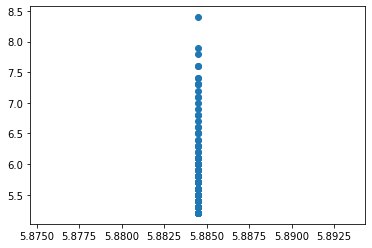

In [63]:
plt.scatter(rfclf.predict(trainx),trainy)

In [65]:
X.shape

(209, 39972)

In [67]:
df['Morgan_FPS'] = [rdMolDescriptors.GetMorganFingerprintAsBitVect(mol,3,1024) for mol in df.ROMol]

In [68]:
X = np.array(list(df.Morgan_FPS))
y = np.array(list(df.pchembl_value))
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3)
rfclf = RandomForestRegressor(n_estimators=100)
skf = KFold(n_splits=10)
for train, test in skf.split(trainX, trainY):
    trainx = trainX[train]
    trainy = trainY[train]
    testx = trainX[test]
    testy = trainY[test]
    rfclf.fit(trainx, trainy)
    predy = rfclf.predict(testx)
    print(mean_squared_error(testy, predy),mean_absolute_error(testy, predy),r2_score(testy, predy))

0.25404719999999936 0.35466666666666513 0.4985910526315801
0.3792005333333332 0.4520000000000001 0.20440022379709089
0.33939453333333336 0.5054666666666665 0.03165394369769159
0.16680926666666665 0.3263333333333334 0.27961449136276406
0.23892379999999858 0.4131333333333325 0.45611235329826294
0.3074400000000005 0.46293333333333414 0.4301976935749582
0.37971264285714235 0.49878571428571383 0.4153218791735417
0.4038675714285708 0.47428571428571326 -1.8351734957020032
0.16785807142856943 0.3540714285714261 0.6413367273520154
0.293446142857143 0.4472857142857141 0.1894666854565945


Automatically created module for IPython interactive environment


/Users/leela.dodda/anaconda3/envs/cinf/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


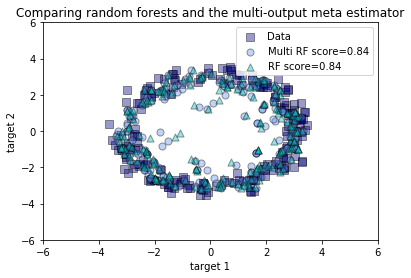

In [69]:
print(__doc__)

# Author: Tim Head <betatim@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += (0.5 - rng.rand(*y.shape))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=400, test_size=200, random_state=4)

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regr_rf.score(X_test, y_test))
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

In [70]:
y_rf

array([[-3.08936406e-01,  3.02660425e+00],
       [-5.55903095e-01, -1.59428840e+00],
       [ 1.90460318e+00,  1.47033352e+00],
       [ 2.99832337e+00,  6.18085656e-01],
       [-2.21067556e-01, -2.72016209e+00],
       [ 2.50896921e+00, -1.17573923e+00],
       [-2.26583962e+00, -2.00682580e+00],
       [ 1.40842092e+00, -2.28295636e+00],
       [-3.24681075e+00, -2.62355179e-01],
       [ 2.87272154e+00, -5.75007906e-01],
       [ 3.11013897e+00, -5.81324558e-02],
       [-2.30442113e+00, -1.11698302e+00],
       [ 7.62477019e-01, -2.80941101e+00],
       [-7.56041079e-01,  2.99599722e+00],
       [-2.30413201e+00, -1.11798743e+00],
       [-1.94936293e+00, -2.71235730e+00],
       [ 3.12800765e+00, -9.85968364e-01],
       [ 4.28817089e-01,  2.79381156e+00],
       [ 1.92270046e+00,  1.49972490e+00],
       [-2.37851030e+00,  2.28854022e+00],
       [ 2.29149431e+00, -5.23656019e-01],
       [-1.32036252e+00,  2.52700130e+00],
       [ 1.69129248e+00,  2.74549858e+00],
       [-3.

In [78]:
def MACCS2Numpy(m):
    fp = rdMolDescriptors.GetMACCSKeysFingerprint(m)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr    

In [80]:
df['MACCS_FP'] = [MACCS2Numpy(m) for m in df.ROMol]

In [85]:
X = np.array(list(df.MACCS_FP))
y = np.array(list(df.pchembl_value))
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3)
rfclf = RandomForestRegressor(n_estimators=50)
skf = KFold(n_splits=10)
for train, test in skf.split(trainX, trainY):
    trainx = trainX[train]
    trainy = trainY[train]
    testx = trainX[test]
    testy = trainY[test]
    rfclf.fit(trainx, trainy)
    predy = rfclf.predict(testx)
    print(mean_squared_error(testy, predy),mean_absolute_error(testy, predy),r2_score(testy, predy))

0.3963542465185179 0.5319644444444438 0.3262337151203799
1.1341449648148152 0.8459000000000001 -1.2731392934556687
0.2826101917037034 0.4257822222222216 -0.3426371016328822
0.4003534743703699 0.5025066666666664 0.48478876839777396
0.3583954460000004 0.48679777777777744 0.4317196945031705
0.39744040370370387 0.5296666666666666 -0.6095048746100322
0.20164728571428575 0.37985714285714345 -0.32627073825503405
0.39023191269841273 0.5218809523809521 0.2972670443872756
0.2902476282798836 0.373091836734694 -0.025203372551039438
0.2599486774603169 0.4444666666666663 -1.541144178664446


In [ ]:
from rdkit.Chem import DataStructs